## Solving Systems of ODEs

Systems of ODEs can be solved in python using odeint by using an array function containing the several variables. 

The following example solves the Foxes and Rabbits population problem as a system of coupled differential equations, where r and f are the populations of rabits and foxes, and a,b,c,e are parameters defining their interations:

$$\frac{dr}{dt}=ar-brf$$
$$\frac{df}{dt}=-cf+ebrf$$

## Import Required Libraries

We'll use:
- `scipy.integrate.odeint` for solving the ordinary differential equations
- `numpy` for numerical operations
- `matplotlib.pyplot` for visualization

In [ ]:
from scipy.integrate import odeint
from numpy import linspace, array
from matplotlib.pyplot import plot, xlabel, ylabel, legend, show, figure, subplot

## Define the Lotka-Volterra Function

This function implements the coupled differential equations. It takes the current population values and returns the rates of change for both species. We "pack" the two variables, r and f, into an array V and return the rates of change dr/dt and df/dt as an array, rate.

In [2]:
def lotka(t, V):
    """
    Population dynamics for the Lotka-Volterra predator-prey model.
    
    Parameters:
    -----------
    t : float
        Time (not used in autonomous system, but required by odeint)
    V : array
        Vector containing [rabbit_population, fox_population]
    
    Returns:
    --------
    rate : array
        Vector containing [dr/dt, df/dt]
    """
    # Unpack populations
    r = V[0]  # rabbits
    f = V[1]  # foxes
    
    # Compute rates of change
    dr = a*r - b*r*f      # rabbit growth - predation
    df = e*b*r*f - c*f    # fox growth - death
    
    # Pack rates into numpy array
    rate = array([dr, df])
    return rate

## Set Model Parameters

These parameters control the dynamics of the system:
- Higher rabbit growth rate ($a$) → more rabbits
- Higher predation rate ($b$) → more interactions between species
- Higher fox death rate ($c$) → fewer foxes
- Higher efficiency ($e$) → foxes reproduce more effectively

In [3]:
# Model parameters
a = 0.1   # rabbit growth rate (1/day)
b = 0.01  # rabbit predation rate (1/(fox·day))
c = 0.1   # fox death rate (1/day)
e = 0.2   # fox growth efficiency (dimensionless)

## Set Initial Conditions

We start with 100 rabbits and 10 foxes at time $t=0$.

In [4]:
# Initial populations
rabbit0 = 100
fox0 = 10
Y0 = array([rabbit0, fox0])  # pack into array

## Define Time Interval

We'll simulate the system for 2 years (730 days) with 500 time points for smooth plotting.

In [5]:
# Time settings
Tstart = 0
Tend = 365 * 2  # 2 years in days
T = linspace(Tstart, Tend, 500)

## Solve the Differential Equations

The `odeint` function numerically integrates the system of ODEs forward in time.

In [6]:
# Solve the ODE
X = odeint(lotka, Y0, T, tfirst=True)

# Unpack the results
# In the output array X: variables are columns, times are rows
rabbits = X[:, 0]
foxes = X[:, 1]

## Visualize the Results

We create two plots:
1. **Time series**: Shows how rabbit and fox populations oscillate over time
2. **Phase portrait**: Shows the relationship between the two populations (foxes vs. rabbits)

The phase portrait traces a closed orbit, characteristic of the periodic oscillations in the Lotka-Volterra model.

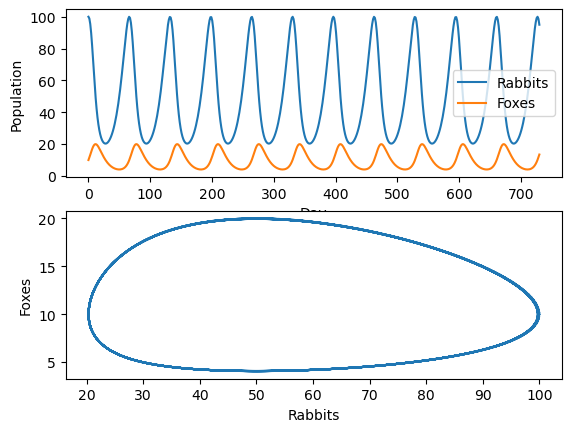

In [7]:
# Create visualization
figure()

# Subplot 1: Population vs Time
subplot(2, 1, 1)
plot(T, rabbits, label='Rabbits')
plot(T, foxes, label='Foxes')
xlabel('Day')
ylabel('Population')
legend()

# Subplot 2: Phase Portrait (Foxes vs Rabbits)
subplot(2, 1, 2)
plot(rabbits, foxes)
xlabel('Rabbits')
ylabel('Foxes')

show()

## Observations

The classic Lotka-Volterra model exhibits **periodic oscillations**:

1. When rabbits are abundant, foxes have plenty of food and their population grows
2. As fox population increases, rabbit predation intensifies, causing rabbit population to decline
3. With fewer rabbits (food), the fox population eventually decreases due to starvation
4. With fewer foxes, rabbit population recovers, and the cycle repeats

The phase portrait shows this as a closed loop, indicating the populations continuously cycle through the same states.